In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [5]:
df.shape

(166800, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

In [7]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,166795.000000,166800.000000,166800.000000,166800.000000,166440.000000,1.668000e+05,1.667950e+05
mean,98173.713750,2020.341793,61.508993,1152.723171,29.178941,2.172420e+08,5.297709e+10
std,2442.584415,3.001465,93.271747,8661.081091,14.853534,7.727458e+07,1.569754e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.790741e+08,5.303301e+10
50%,98122.000000,2021.000000,0.000000,0.000000,33.000000,2.244045e+08,5.303303e+10
75%,98371.000000,2023.000000,84.000000,0.000000,42.000000,2.513421e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [9]:
# number of null values
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [11]:
# drop null values (because there is not so many)
df = df.dropna()

In [12]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [14]:
# number of unique values
df.nunique()

VIN (1-10)                                            10310
County                                                   39
City                                                    468
State                                                     1
Postal Code                                             540
Model Year                                               22
Make                                                     39
Model                                                   138
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       166435
Vehicle Location                                        540
Electric Utility                                         75
2020 Census Tract                       

In [15]:
# As we see we only have one state (which is Washington), and 468 cities. 138 models from 1997 to 2024

In [25]:
# show most popular cities with electic cars
most_cities_with_electric = df.groupby("City")["Model"].count().sort_values(ascending=False).head(10)

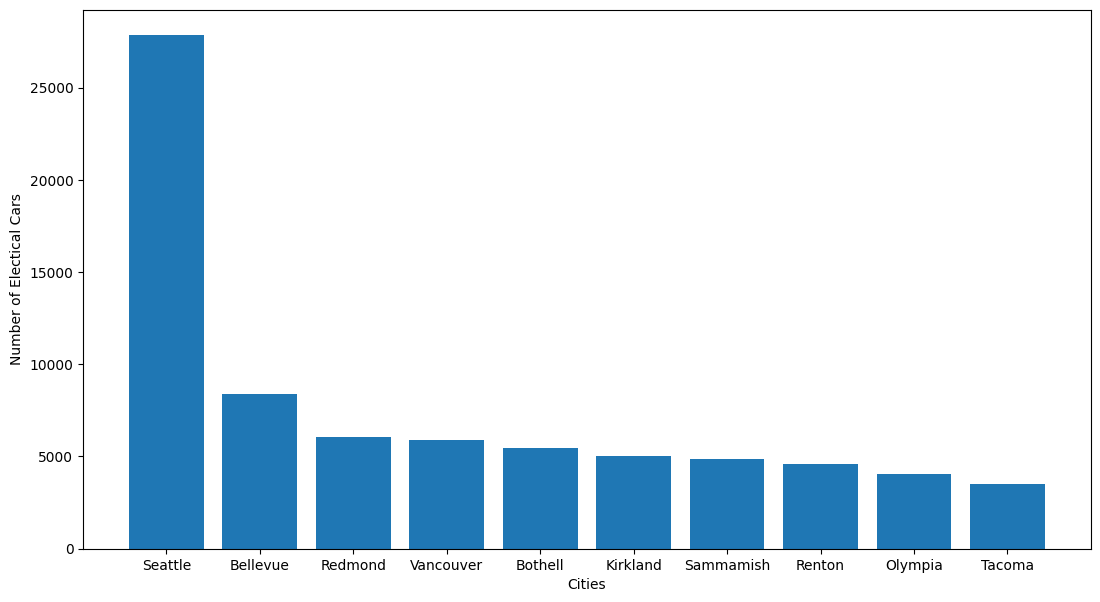

In [31]:
plt.figure(figsize=(13, 7))
plt.bar(most_cities_with_electric.index, most_cities_with_electric)
plt.xlabel("Cities")
plt.ylabel("Number of Electical Cars")
plt.show()

In [38]:
# Show most popular companies
most_popular_companies = df.groupby("Make")["Model Year"].count().sort_values(ascending=False).head(10)

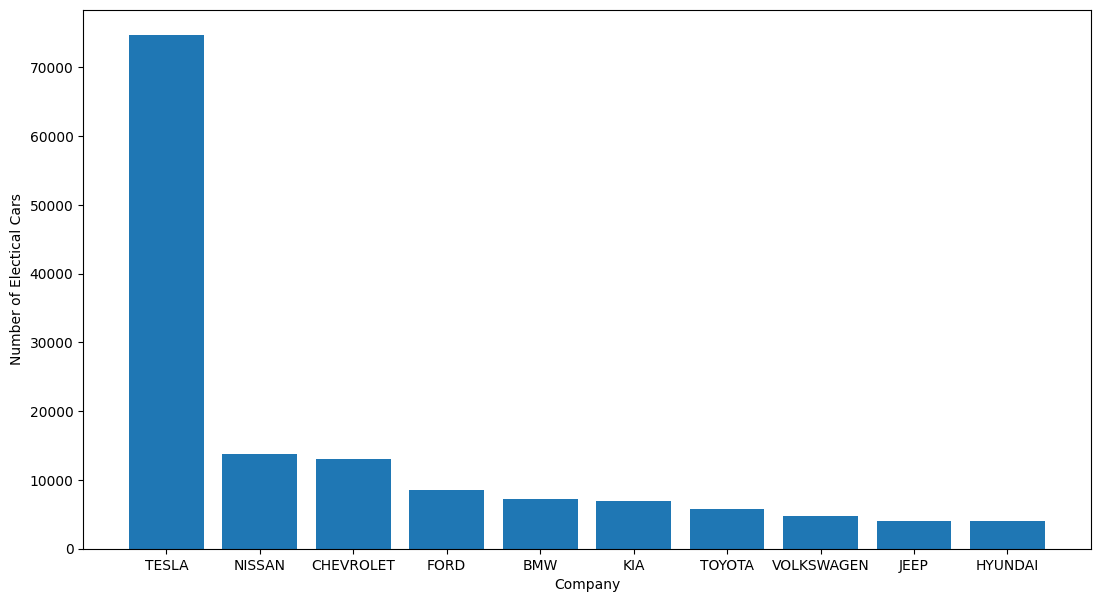

In [40]:
plt.figure(figsize=(13, 7))
plt.bar(most_popular_companies.index, most_popular_companies)
plt.xlabel("Company")
plt.ylabel("Number of Electical Cars")
plt.show()

In [46]:
# Type of electrical cars
df["Electric Vehicle Type"].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

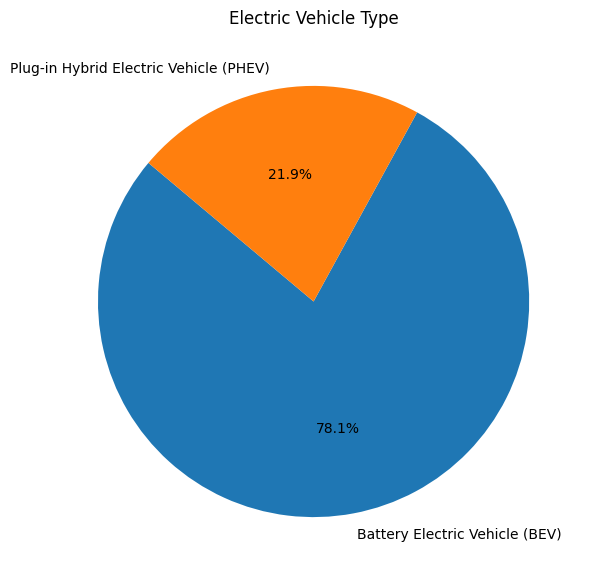

In [50]:
plt.figure(figsize=(13, 7))
plt.pie(df["Electric Vehicle Type"].value_counts(), labels=df["Electric Vehicle Type"].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title("Electric Vehicle Type")
plt.show()

In [58]:
# Electric Range
# Describes how far a vehicle can travel purely on its electric charge.

# We will see the top 10

df.sort_values(by="Electric Range", ascending=False).head(10)[["Make", "Model Year"]]

,Make,Model Year
114937,TESLA,2020
54717,TESLA,2020
29332,TESLA,2020
68966,TESLA,2020
122309,TESLA,2020
68961,TESLA,2020
68918,TESLA,2020
115730,TESLA,2020
29150,TESLA,2020
51734,TESLA,2020


In [59]:
# Wow, they are all Tesla 2020
# Elon Musk, you are the best 💪💪

In [60]:
# Now, we will see the average Electric Range for each company
df["Make"].unique()

array(['FIAT', 'TESLA', 'BMW', 'RIVIAN', 'CHRYSLER', 'CHEVROLET', 'KIA',
       'FORD', 'TOYOTA', 'NISSAN', 'MITSUBISHI', 'HONDA', 'AUDI', 'JEEP',
       'VOLVO', 'HYUNDAI', 'VOLKSWAGEN', 'SUBARU', 'LUCID', 'MINI',
       'POLESTAR', 'SMART', 'LINCOLN', 'MERCEDES-BENZ', 'LEXUS',
       'PORSCHE', 'ALFA ROMEO', 'DODGE', 'JAGUAR', 'CADILLAC',
       'LAND ROVER', 'MAZDA', 'GENESIS', 'FISKER', 'GMC', 'TH!NK',
       'WHEEGO ELECTRIC CARS', 'AZURE DYNAMICS', 'BENTLEY'], dtype=object)

In [65]:
top_companies_electric_range = df.groupby("Make")["Electric Range"].mean().sort_values(ascending=False).head(10)
top_companies_electric_range

Make
JAGUAR                  203.294118
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
CHEVROLET                95.035337
FIAT                     85.625468
NISSAN                   81.542609
TESLA                    81.165254
SMART                    62.356364
AZURE DYNAMICS           56.000000
AUDI                     52.094907
Name: Electric Range, dtype: float64

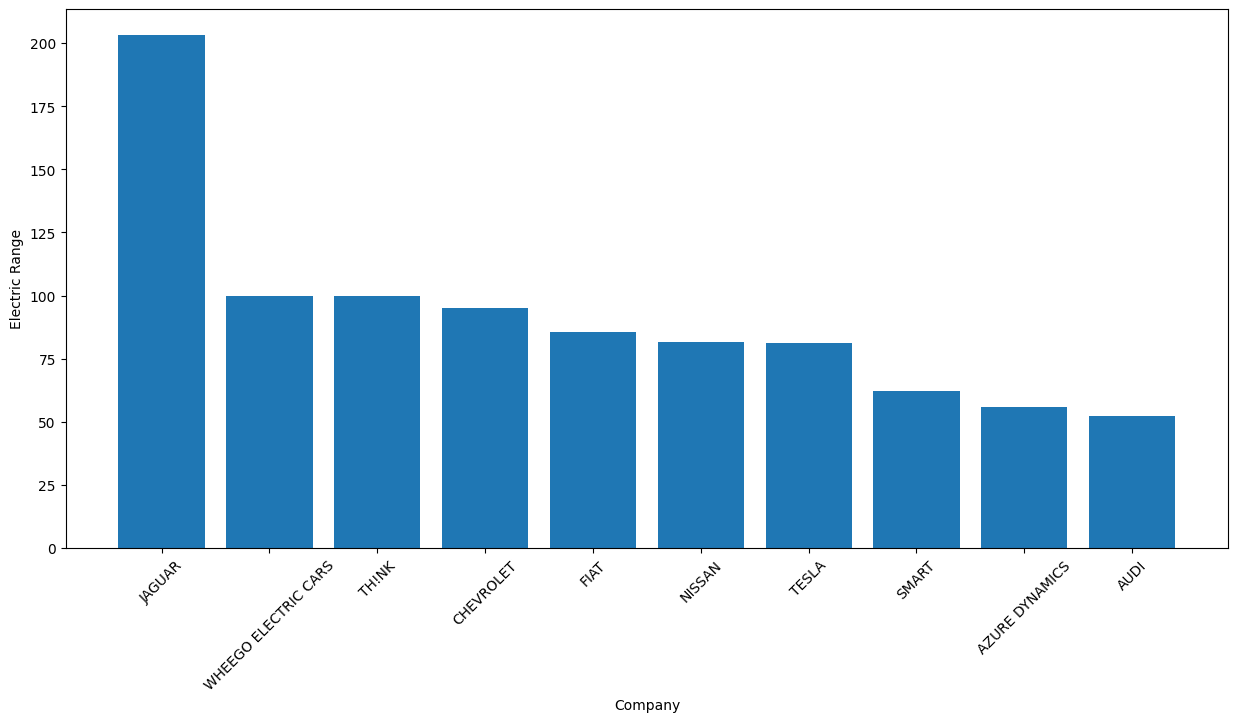

In [68]:
plt.figure(figsize=(15, 7))
plt.bar(top_companies_electric_range.index, top_companies_electric_range)
plt.xlabel("Company")
plt.ylabel("Electric Range")
plt.xticks(rotation=45)
plt.show()

In [70]:
# Very interesting we have Jaguar the best one 💪, and tesla is in the 7th position
# But why? maybe the old models of tesla are not as good as the new ones ?
# We will verify this now

In [75]:
df[df["Make"] == "JAGUAR"].groupby("Model Year")["Electric Range"].mean()

Model Year
2019    234.0
2020    234.0
2022      0.0
2023      0.0
2024      0.0
Name: Electric Range, dtype: float64

In [83]:
df[df["Make"] == "TESLA"].groupby("Model Year")["Electric Range"].mean()

Model Year
2008    220.000000
2010    245.000000
2011    245.000000
2012    265.000000
2013    208.000000
2014    208.000000
2015    208.000000
2016    205.960685
2017    206.404003
2018    221.423619
2019    229.034886
2020    296.924352
2021      0.000000
2022      0.000000
2023      0.000000
Name: Electric Range, dtype: float64

In [97]:
# Aaah, actually the problem is that we don't have the electric range the last 3 years (2021-2023)
# So, I will drop all columns above 2020, and we will try again to compare

df2 = df[~df["Model Year"].isin([2021, 2022, 2023, 2024])]

In [98]:
df2[df2["Make"] == "TESLA"].groupby("Model Year")["Electric Range"].mean()

Model Year
2008    220.000000
2010    245.000000
2011    245.000000
2012    265.000000
2013    208.000000
2014    208.000000
2015    208.000000
2016    205.960685
2017    206.404003
2018    221.423619
2019    229.034886
2020    296.924352
Name: Electric Range, dtype: float64

In [99]:
# Now, We Dropped the years above 2020, we will try again

top_companies_electric_range = df2.groupby("Make")["Electric Range"].mean().sort_values(ascending=False).head(10)
top_companies_electric_range

Make
TESLA                   240.652833
JAGUAR                  234.000000
HYUNDAI                 150.908705
CHEVROLET               135.323183
KIA                     131.856464
VOLKSWAGEN              107.421348
NISSAN                  103.737195
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
AUDI                     93.668939
Name: Electric Range, dtype: float64

In [100]:
# Ok, Ok now we have our tesla in the first position as expected
# And JAGUAR still just after Tesla

# So, Elon Musk still the best 💪💪

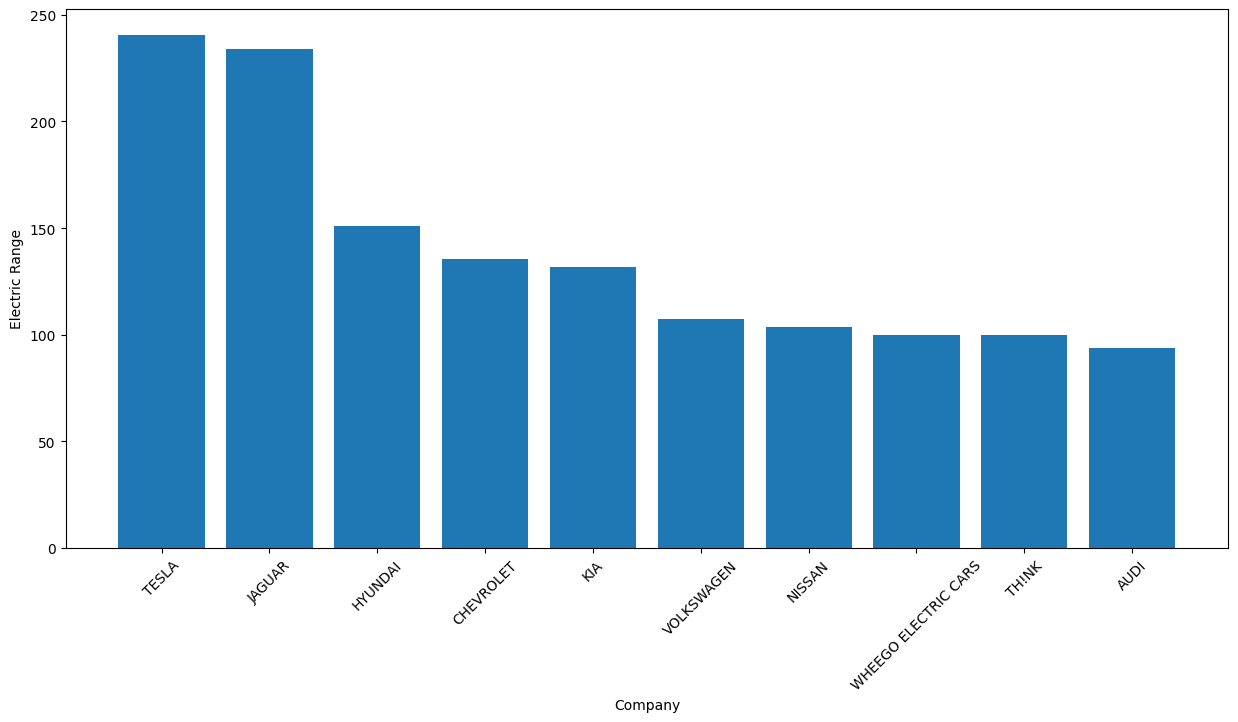

In [101]:
# We plot
plt.figure(figsize=(15, 7))
plt.bar(top_companies_electric_range.index, top_companies_electric_range)
plt.xlabel("Company")
plt.ylabel("Electric Range")
plt.xticks(rotation=45)
plt.show()

In [102]:
# The plot is more beautiful now with TESLA in the first position

In [109]:
df2.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
6,2C4RC1H7XJ,Kitsap,Port Orchard,WA,98367.0,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,26.0,477087012,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
7,1G1FX6S01H,Kitsap,Poulsbo,WA,98370.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,23.0,214494213,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10


<Axes: >

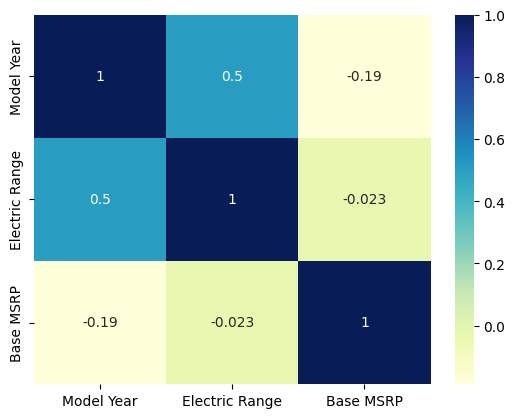

In [104]:
# Correlation between the Model Year, the Electric Range, Base MSRP(the lowest Manufacturer's Suggested Retail Price)
sns.heatmap(df2[["Model Year", "Electric Range", "Base MSRP"]].corr(), annot=True, cmap="YlGnBu")

In [107]:
# So, as we see in the heatmap, the model year and the electric range are positively highly correlated, as I expeted
# And between the year and the base price a negative correlation!!!  Which means as the model year increase the base price of the car decreases !!!!!
# And the question is why?

In [106]:
# When I searched in the internet to answer this question, I found many reasons which explains this, sush as:
# 1- Technological Advancements: As technology advances, manufacturing processes become more efficient, and production costs may decrease
# 2- Market Competition: Increased competition in the electric vehicle market could drive manufacturers to offer newer models at lower prices to remain competitive
# 3- Government Incentives: Government incentives, subsidies, or tax credits for electric vehicles may vary over time and across regions

# By considering these factors, we can better understand why there might be a negative correlation between the model year and the base price of electric vehicles. 

In [108]:
# The evolution of the Electric Range from 1997 to 2020
electric_range_by_year = df2.groupby("Model Year")["Electric Range"].mean()
electric_range_by_year

Model Year
1997     39.000000
1998     58.000000
1999     74.000000
2000     58.000000
2002     95.000000
2003     95.000000
2008    220.000000
2010    226.086957
2011     70.690537
2012     60.566421
2013     80.007202
2014     81.125674
2015     98.563538
2016    101.199418
2017    113.204002
2018    155.385705
2019    177.026760
2020    238.565263
Name: Electric Range, dtype: float64

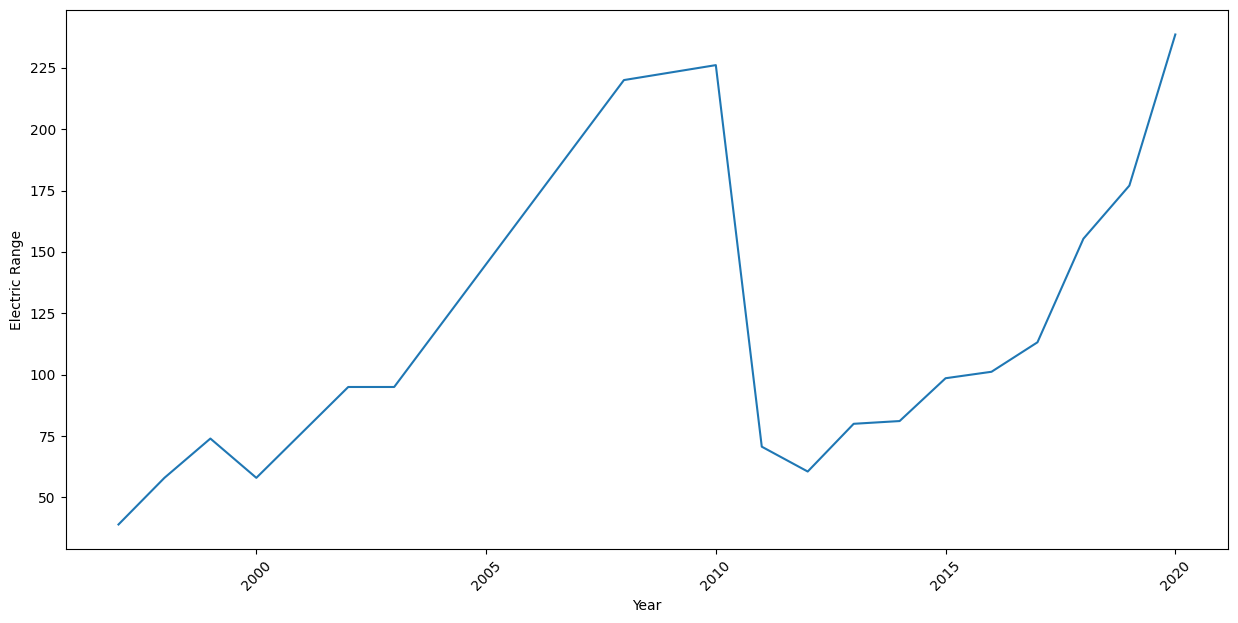

In [110]:
plt.figure(figsize=(15, 7))
plt.plot(electric_range_by_year.index, electric_range_by_year)
plt.xlabel("Year")
plt.ylabel("Electric Range")
plt.xticks(rotation=45)
plt.show()

In [111]:
# What is the reason why the electric range is suddely high between 2008 and 2010 ?
# We will discover it together

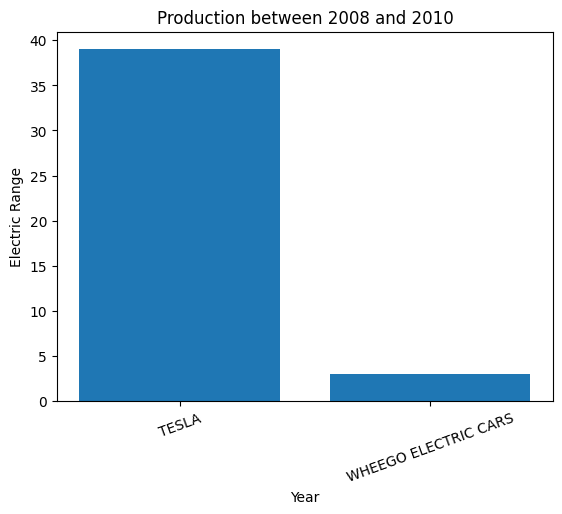

In [125]:
# Get just year 2008 and 2010 since ther is not data on 2009
df_2008_2010 = df2[df2["Model Year"].isin([2008, 2010])]["Make"].value_counts()
plt.figure()
plt.bar(df_2008_2010.index, df_2008_2010)
plt.xlabel("Year")
plt.ylabel("Electric Range")
plt.xticks(rotation=20)
plt.title("Production between 2008 and 2010")
plt.show()


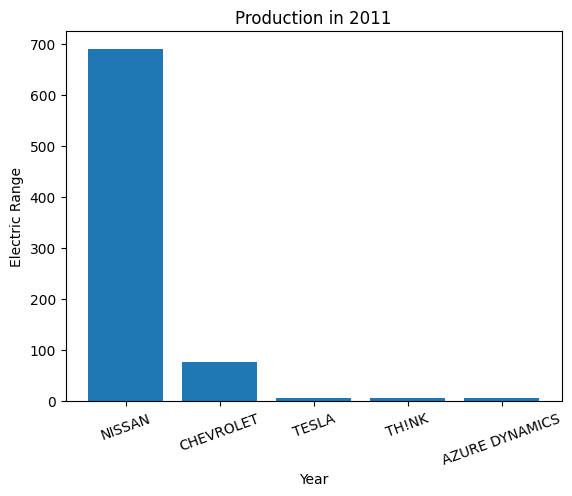

In [126]:
df_2011 = df2[df2["Model Year"] == 2011]["Make"].value_counts()
plt.figure()
plt.bar(df_2011.index, df_2011)
plt.xlabel("Year")
plt.ylabel("Electric Range")
plt.xticks(rotation=20)
plt.title("Production in 2011")
plt.show()

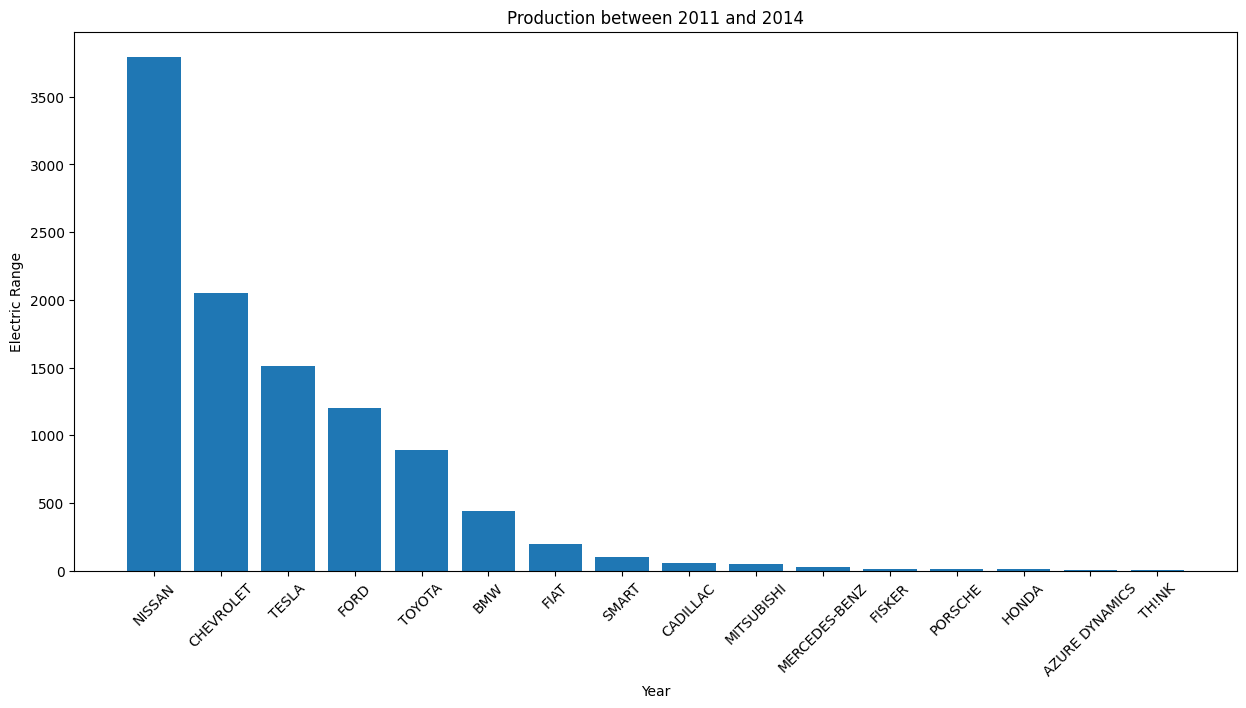

In [129]:
df_2011_2014 = df2[df2["Model Year"].isin([2011, 2012, 2013, 2014])]["Make"].value_counts()
plt.figure(figsize=(15, 7))
plt.bar(df_2011_2014.index, df_2011_2014)
plt.xlabel("Year")
plt.ylabel("Electric Range")
plt.xticks(rotation=45)
plt.title("Production between 2011 and 2014")
plt.show()

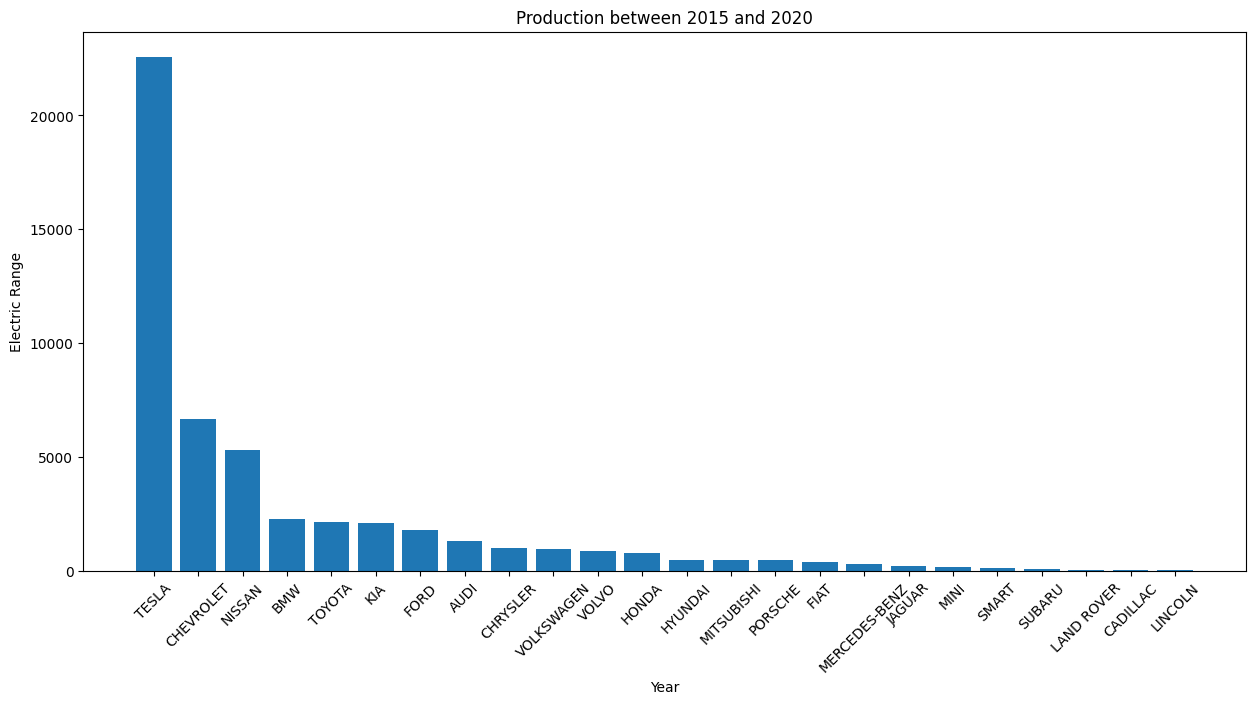

In [130]:
df_2015_2020 = df2[df2["Model Year"] > 2015]["Make"].value_counts()
plt.figure(figsize=(15, 7))
plt.bar(df_2015_2020.index, df_2015_2020)
plt.xlabel("Year")
plt.ylabel("Electric Range")
plt.xticks(rotation=45)
plt.title("Production between 2015 and 2020")
plt.show()

In [131]:
# Now, we can understand better
# After a fast search on the internet, I found that TESLA started its production in 2008 As we can see in the bars plots above
# In addition to that, we saw previuosly that Tesla is very powerful in Electric Range, this is why it was high in 2008 and 2010
# And it was less between 2011 and 2014, beacause Tesla does not produced many cars (We can see that it was NISSAN and CHEVROLET)
# But, From 2015 to 2020 the electric Range becomes higher, and you can guess Why: TESLA is came back 💪💪

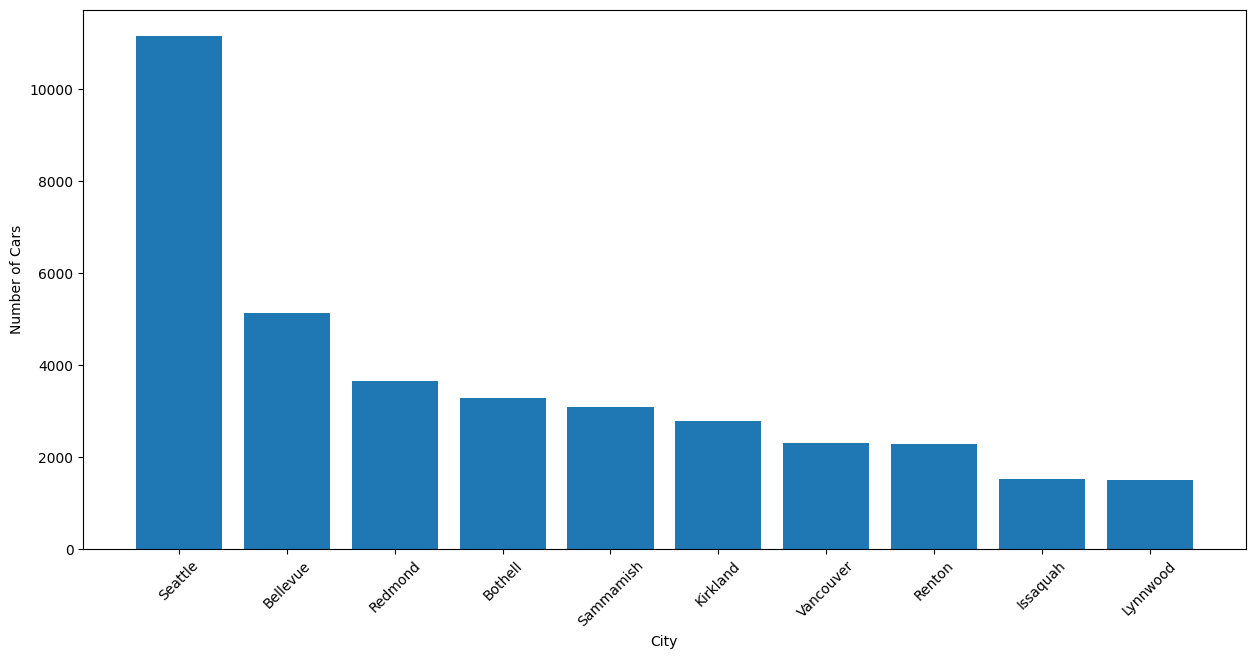

In [143]:
# Another thing we can verify is the best cities for Tesla in US
df_tesla = df[df["Make"] == "TESLA"]["City"].value_counts().head(10)
plt.figure(figsize=(15, 7))
plt.bar(df_tesla.index, df_tesla)
plt.xlabel("City")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.show()

In [144]:
# So, Seattle is your favorite city Elon Musk aaa
# Aah, this is why you want to launch your new spaceX satellie via Seattle 😂

In [145]:
# So, the conclusion is that:
# No one can defeat Elon Musk 😁😁